# Regression & Its Evaluation | Assignment

Question 1:  What is Simple Linear Regression?

--> Simple Linear Regression (SLR) is a statistical method that models the linear relationship between two quantitative variables, one independent (predictor) and one dependent (response), by fitting a straight line to the data

Question 2: What are the key assumptions of Simple Linear Regression?

-->The key assumptions for simple linear regression are: Linearity, a linear relationship between variables; Independence, observations are not correlated; Homoscedasticity, errors have constant variance; Normality, errors are normally distributed; and No perfect collinearity, the independent variable is not a constant

Question 3: What is heteroscedasticity, and why is it important to address in regression
models?

-->Heteroscedasticity is a statistical phenomenon in regression models where the variance of the residuals (errors) is not constant across the range of the independent variables, leading to a fan or cone shape in a residual plot. It is important to address because while it doesn't cause bias in coefficient estimates, it undermines the reliability of standard errors, resulting in invalid hypothesis tests, inaccurate confidence intervals, and generally less precise coefficient estimates, making it difficult to trust the model's inferences

Question 4: What is Multiple Linear Regression?

-->Multiple Linear Regression (MLR) is a statistical technique used to predict the value of a single dependent variable by modeling the linear relationship it has with two or more independent variables, or predictors

Question 5: What is polynomial regression, and how does it differ from linear
regression?

-->The key difference is that linear regression assumes a straight-line relationship, while polynomial regression uses an nth-degree polynomial equation to capture curved patterns in the data

Question 6:  Implement a Python program to fit a Simple Linear Regression model to
the following sample data:
● X = [1, 2, 3, 4, 5]
● Y = [2.1, 4.3, 6.1, 7.9, 10.2]

In [1]:
import numpy as np

# Sample data
X = [1, 2, 3, 4, 5]
Y = [2.1, 4.3, 6.1, 7.9, 10.2]

# Convert lists to numpy arrays for easier calculations
X = np.array(X)
Y = np.array(Y)

# Calculate the mean of X and Y
mean_X = np.mean(X)
mean_Y = np.mean(Y)

# Number of data points
n = len(X)

# Calculate the slope (b1) and the y-intercept (b0)
numerator = np.sum((X - mean_X) * (Y - mean_Y))
denominator = np.sum((X - mean_X)**2)

b1 = numerator / denominator
b0 = mean_Y - b1 * mean_X

# Print the results
print(f"The calculated slope (b1) is: {b1:.4f}")
print(f"The calculated y-intercept (b0) is: {b0:.4f}")
print(f"The simple linear regression equation is: y = {b0:.4f} + {b1:.4f}x")


The calculated slope (b1) is: 1.9800
The calculated y-intercept (b0) is: 0.1800
The simple linear regression equation is: y = 0.1800 + 1.9800x


Question 7: Fit a Multiple Linear Regression model on this sample data:
● Area = [1200, 1500, 1800, 2000]
● Rooms = [2, 3, 3, 4]
● Price = [250000, 300000, 320000, 370000].
Check for multicollinearity using VIF and report the results.

In [2]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sample data (replace with your actual data)
data = {
    'Area' : [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
}
df = pd.DataFrame(data)

# Define independent variables (X) and dependent variable (y)
X = df[['Area', 'Rooms']]
y = df['Price']

# Add a constant to the independent variables for the intercept term
X = sm.add_constant(X)

# Fit the Multiple Linear Regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print("Multiple Linear Regression Model Summary:")
print(model.summary())

# Calculate VIF for multicollinearity check
def calculate_vif(df_features):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df_features.columns
    vif_data["VIF"] = [variance_inflation_factor(df_features.values, i) for i in range(df_features.shape[1])]
    return vif_data

# Calculate VIF for the independent variables (excluding the constant)
vif_results = calculate_vif(df[['Area', 'Rooms']])

print("\nVariance Inflation Factor (VIF) Results:")
print(vif_results)

Multiple Linear Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     351.0
Date:                Wed, 10 Sep 2025   Prob (F-statistic):             0.0377
Time:                        05:51:57   Log-Likelihood:                -35.242
No. Observations:                   4   AIC:                             76.48
Df Residuals:                       1   BIC:                             74.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Question 8:  Implement polynomial regression on the following data:
● X = [1, 2, 3, 4, 5]
● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
Fit a 2nd-degree polynomial and plot the resulting curve.

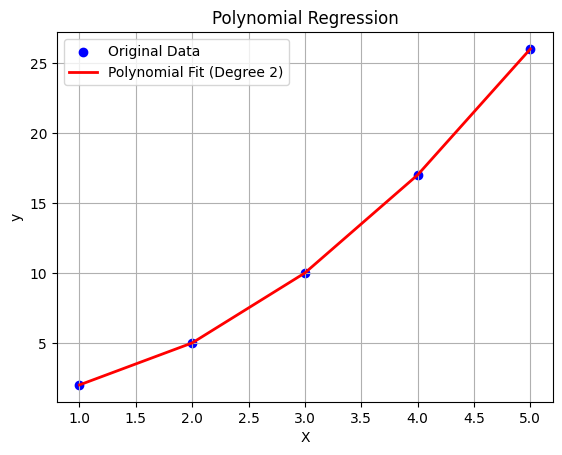

Coefficients: [-2.27004598e-15  1.00000000e+00]
Intercept: 1.0000000000000018


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 1. Define the data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1) # Reshape X for scikit-learn
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# 2. Transform the input data to include polynomial features
# Choose the degree of the polynomial. For y = x^2 + 1, degree=2 is appropriate.
degree = 2
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly.fit_transform(X)

# 3. Fit a Linear Regression model to the transformed data
model = LinearRegression()
model.fit(X_poly, y)

# 4. Make predictions using the fitted model
y_pred = model.predict(X_poly)

# 5. Visualize the results
plt.scatter(X, y, color='blue', label='Original Data')
plt.plot(X, y_pred, color='red', linewidth=2, label=f'Polynomial Fit (Degree {degree})')
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Print the coefficients of the polynomial model
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Question 9: Create a residuals plot for a regression model trained on this data:
● X = [10, 20, 30, 40, 50]
● Y = [15, 35, 40, 50, 65]
Assess heteroscedasticity by examining the spread of residuals.

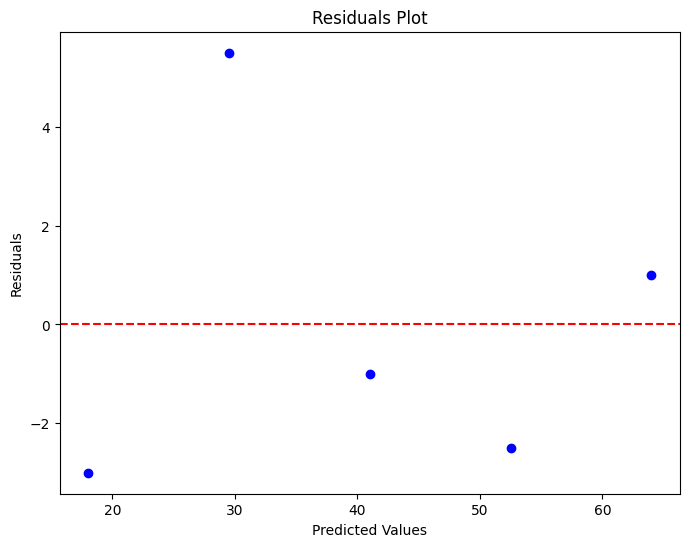

residuals :[-3.   5.5 -1.  -2.5  1. ]


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Given data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Train the linear regression model
model = LinearRegression()
model.fit(X, Y)

# Predict Y values
Y_pred = model.predict(X)
# Calculate residuals
residuals = Y - Y_pred
# Create the residuals plot
plt.figure(figsize=(8, 6))
plt.scatter(Y_pred, residuals, color='blue')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()
print(f'residuals :{residuals}')

Question 10: Imagine you are a data scientist working for a real estate company. You
need to predict house prices using features like area, number of rooms, and location.
However, you detect heteroscedasticity and multicollinearity in your regression
model. Explain the steps you would take to address these issues and ensure a robust
model.